In [1]:
import pandas as pd
import numpy as np


In [6]:
breast_cancer_data = pd.read_csv('breast-cancer-wisconsin.tsv.gz',
                                sep='\t',
                                compression='gzip')

In [7]:
from collections import Counter

In [8]:
Counter(breast_cancer_data['class'].values)

Counter({1: 212, 0: 357})

In [9]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
cross_val_score(RandomForestClassifier(n_estimators=100,n_jobs=-1),
               breast_cancer_data.drop('class',axis=1).values,
               breast_cancer_data.loc[:,'class'].values,cv=StratifiedKFold(n_splits=5,shuffle=True))

array([0.9826087 , 0.94782609, 0.94690265, 0.92920354, 0.97345133])

# Visualize the Predictios vs Actual status

''

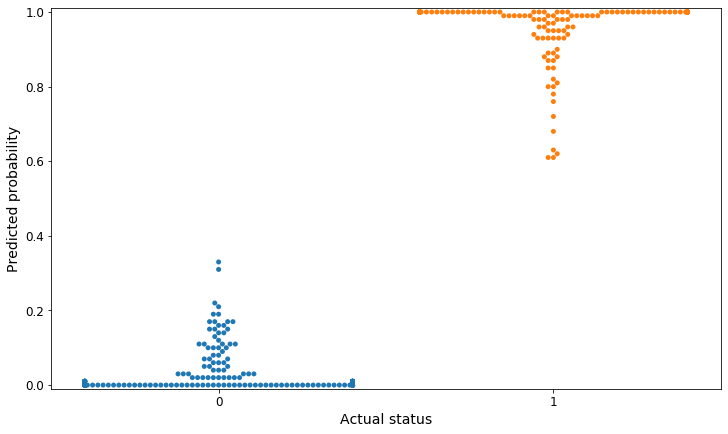

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data.drop('class', axis=1).values,
                                                    breast_cancer_data['class'].values,
                                                    stratify=breast_cancer_data['class'].values,
                                                    train_size=0.75, test_size=0.25)

clf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
clf.fit(X_train, y_train)

plt.figure(figsize=(12, 7))
sb.swarmplot(y_train, clf.predict(X_train))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Actual status', fontsize=14)
plt.ylabel('Predicted probability', fontsize=14)
plt.ylim(-0.01, 1.01)
;

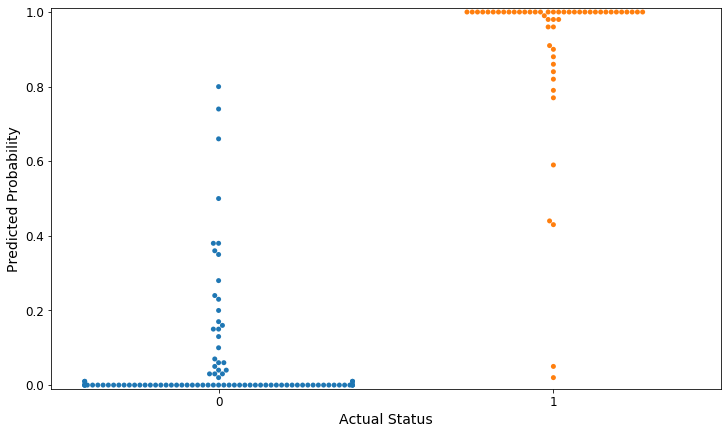

In [16]:
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(breast_cancer_data.drop('class',axis=1).values,
                                                breast_cancer_data['class'].values,
                                                stratify= breast_cancer_data['class'].values,
                                                train_size=0.75,test_size=0.25)
clf = RandomForestRegressor(n_estimators=100,n_jobs=-1)
clf.fit(X_train,y_train)

plt.figure(figsize=(12,7))
sb.swarmplot(y_test,clf.predict(X_test))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Actual Status',fontsize=14)
plt.ylabel('Predicted Probability',fontsize=14)
plt.ylim(-0.01,1.01);

# Crowd Machine

In [18]:
from sklearn.pipeline import make_pipeline, make_union
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor,VotingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score,StratifiedKFold

breast_cancer_data = pd.read_csv('breast-cancer-wisconsin.tsv.gz',
                                sep='\t',
                                compression='gzip')
all_features = breast_cancer_data.drop('class',axis=1).values
all_classes = breast_cancer_data['class'].values
union_ops = [SelectKBest(k='all')]
for i,mwfl in enumerate(np.arange(0.,0.21,0.01)):
    union_ops.append(VotingClassifier(estimators=[('rf-mwfl={}'.format(mwfl),
                                                  RandomForestRegressor(n_estimators=100,
                                                                       n_jobs=-1,
                                                                       min_weight_fraction_leaf=mwfl))]))
    clf = RandomForestClassifier(n_estimators=100,n_jobs=-1,min_weight_fraction_leaf=mwfl)
    print('RF w/ wmf1={:0.2f} CV Score: {:0.3f}'.format(
    mwfl,
    np.mean(cross_val_score(clf,all_features,all_classes,cv=StratifiedKFold(n_splits=5,shuffle=True)))))
clf = make_pipeline(make_union(*union_ops),RandomForestClassifier(n_estimators=100,n_jobs=-1))
print('Crowd Machine CV Score: {:0.3f}'.format(np.mean(cross_val_score(clf,all_features,all_classes,cv=StratifiedKFold(n_splits=5,shuffle=True)))))

RF w/ wmf1=0.00 CV Score: 0.965
RF w/ wmf1=0.01 CV Score: 0.949
RF w/ wmf1=0.02 CV Score: 0.954
RF w/ wmf1=0.03 CV Score: 0.956
RF w/ wmf1=0.04 CV Score: 0.953
RF w/ wmf1=0.05 CV Score: 0.939
RF w/ wmf1=0.06 CV Score: 0.942
RF w/ wmf1=0.07 CV Score: 0.940
RF w/ wmf1=0.08 CV Score: 0.937
RF w/ wmf1=0.09 CV Score: 0.942
RF w/ wmf1=0.10 CV Score: 0.942
RF w/ wmf1=0.11 CV Score: 0.937
RF w/ wmf1=0.12 CV Score: 0.942
RF w/ wmf1=0.13 CV Score: 0.932
RF w/ wmf1=0.14 CV Score: 0.935
RF w/ wmf1=0.15 CV Score: 0.940
RF w/ wmf1=0.16 CV Score: 0.939
RF w/ wmf1=0.17 CV Score: 0.937
RF w/ wmf1=0.18 CV Score: 0.933
RF w/ wmf1=0.19 CV Score: 0.933
RF w/ wmf1=0.20 CV Score: 0.933
Crowd Machine CV Score: 0.965


In [19]:
spambase = pd.read_csv('spambase.tsv.gz',sep='\t',
                      compression='gzip')

In [20]:
from collections import Counter
Counter(spambase['class'].values)

Counter({1: 1813, 0: 2788})

In [21]:
cross_val_score(RandomForestClassifier(n_estimators=100,n_jobs=-1),
               spambase.drop('class',axis=1).values,
               spambase.loc[:,'class'].values,
               cv=StratifiedKFold(n_splits=5,shuffle=True))

array([0.95656895, 0.94679696, 0.95005429, 0.95103373, 0.95973885])

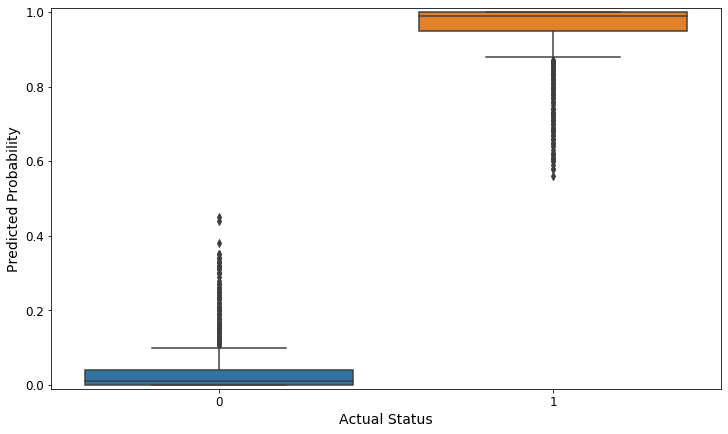

In [22]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(spambase.drop('class',axis=1).values,
                                                spambase['class'].values,
                                                stratify=spambase['class'].values,
                                                train_size=0.75,test_size=0.25)
clf = RandomForestRegressor(n_estimators=100,n_jobs=-1)
clf.fit(X_train,y_train)

plt.figure(figsize=(12,7))
sb.boxplot(y_train,clf.predict(X_train))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Actual Status',fontsize=14)
plt.ylabel('Predicted Probability',fontsize=14)
plt.ylim(-0.01,1.01);

# Testing Data

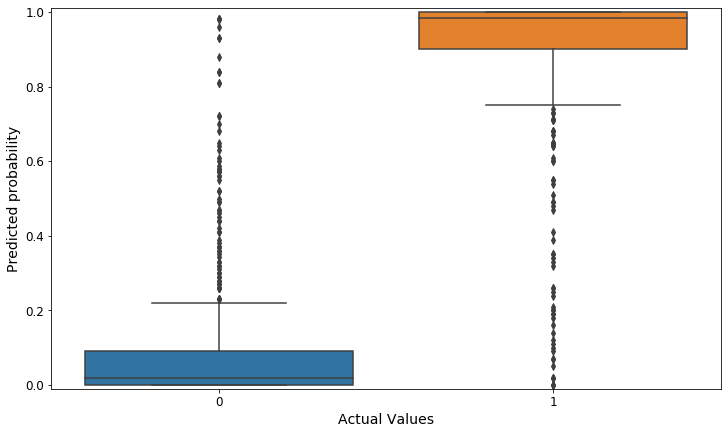

In [23]:
X_train,X_test, y_train,y_test =train_test_split(spambase.drop('class',axis=1).values,
                                                spambase['class'].values,
                                                stratify=spambase['class'].values,
                                                train_size=0.75,test_size=0.25)

clf = RandomForestRegressor(n_estimators=100,n_jobs=-1)
clf.fit(X_train,y_train)

plt.figure(figsize=(12,7))
sb.boxplot(y_test,clf.predict(X_test))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Actual Values",fontsize=14)
plt.ylabel("Predicted probability",fontsize=14)
plt.ylim(-0.01,1.01);

In [24]:
spambase_data = pd.read_csv('spambase.tsv.gz',
                           sep='\t',
                           compression='gzip')
all_features = spambase_data.drop('class',axis=1).values
all_classes = spambase_data['class'].values
union_ops = [SelectKBest(k='all')]

for i,mwfl in enumerate(np.arange(0.,0.21,0.01)):
    union_ops.append(VotingClassifier(estimators=[('rf-mwfl={}'.format(mwfl),
                                                  RandomForestRegressor(n_estimators=100,
                                                                       n_jobs=-1,
                                                                       min_weight_fraction_leaf=mwfl))]))
    clf = RandomForestRegressor(n_estimators=100,n_jobs=-1,min_weight_fraction_leaf=mwfl)
    print('RF w/ mwfl={:0.2f} CV Score : {:0.3f}'.format(mwfl,
                                                        np.mean(cross_val_score(clf,all_features,all_classes,cv=StratifiedKFold(n_splits=5,shuffle=True)))))
clf = make_pipeline(make_union(*union_ops),RandomForestClassifier(n_estimators=100,n_jobs=-1))
print('Crowd machine cv score :{:0.3f}'.format(np.mean(cross_val_score(clf,all_features,all_classes,cv=StratifiedKFold(n_splits=5,shuffle=True)))))

RF w/ mwfl=0.00 CV Score : 0.810
RF w/ mwfl=0.01 CV Score : 0.744
RF w/ mwfl=0.02 CV Score : 0.711
RF w/ mwfl=0.03 CV Score : 0.679
RF w/ mwfl=0.04 CV Score : 0.658
RF w/ mwfl=0.05 CV Score : 0.646
RF w/ mwfl=0.06 CV Score : 0.634
RF w/ mwfl=0.07 CV Score : 0.607
RF w/ mwfl=0.08 CV Score : 0.577
RF w/ mwfl=0.09 CV Score : 0.571
RF w/ mwfl=0.10 CV Score : 0.568
RF w/ mwfl=0.11 CV Score : 0.555
RF w/ mwfl=0.12 CV Score : 0.549
RF w/ mwfl=0.13 CV Score : 0.533
RF w/ mwfl=0.14 CV Score : 0.524
RF w/ mwfl=0.15 CV Score : 0.523
RF w/ mwfl=0.16 CV Score : 0.534
RF w/ mwfl=0.17 CV Score : 0.519
RF w/ mwfl=0.18 CV Score : 0.517
RF w/ mwfl=0.19 CV Score : 0.505
RF w/ mwfl=0.20 CV Score : 0.501
Crowd machine cv score :0.945


In [25]:
from collections import defaultdict,Counter
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
import numpy as np
from copy import deepcopy

In [26]:
class CrowdMachineClassifier(BaseEstimator):
    def __init__(self,estimators,default_label):
        self.estimators = deepcopy(estimators)
        self.default_label = default_label
        self.crowd_ensemble = None
        self.crowd_matrix = None
        self.prediction_matrix = None
    def fit(self,features,class_labels):
        estimator_tuples = list(zip(range(len(self.estimators)),self.estimators))
        self.crowd_ensemble = VotingClassifier(estimators=estimator_tuples,voting='hard')
        crowd_predictions = self.crowd_ensemble.fit_transform(features,class_labels)
        self.crowd_matrix = defaultdict(list)
        
        for crowd_prediction, class_label in zip(crowd_predictions,class_labels):
            self.crowd_matrix[tuple(crowd_prediction)].append(class_label)
        self.prediction_matrix = defaultdict(int)
        
        for prediction_tuple in self.crowd_matrix:
            self.prediction_matrix[prediction_tuple] =Counter(self.crowd_matrix[prediction_tuple]).most_common(1)[0][0]
        self.prediction_matrix = dict(self.prediction_matrix)
        return self
    
    def predict(self,features):
        if self.prediction_matrix in None:
            raise ValueError('The Crowd Machine must be fit before predict can be called')
        
        crowd_predictions = self.crowd_ensemble.transform(features)
        predictions = []
        for crowd_prediction in crowd_predictions:
            try:
                predictions.append(self.prediction_matrix[tuple(crowd_prediction)])
            except KeyError:
                predictions.append(self.default_label)
        return np.array(predictions)
    
    def fit_predict(self,features,class_label):
        self.fit(features,class_labels)
        return self.predict(features)

    def score(self,features,class_labels,scoring_function=None, **scoring_fucntion_kwargs):
        if self.prediction_matrix in None:
            raise ValueError('The Crowd Machine must be fit before score can be called')
        
        predictions = self.predict(features)
        if scoring_function is None:
            return accuracy_score(class_labels,predictions)
        else:
            return scoring_function(class_labels,predictions,**scoring_fucntion_kwargs)

In [33]:
clf = CrowdMachineClassifier(estimators=[
    RandomForestClassifier(n_estimators=10,n_jobs=-1,random_state=2),
    RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=2),
    RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=2)
],
                            default_label=0)


In [28]:
clf = RandomForestClassifier(n_estimators=100,n_jobs=-1,random_state=2)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9496090356211989

In [29]:
clf = RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=2)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.94874022589053

In [30]:
clf = RandomForestClassifier(n_estimators=10,n_jobs=-1,random_state=2)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9417897480451781

In [31]:
clf = RandomForestClassifier(n_estimators=150,n_jobs=-1,random_state=2)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.946133796698523